In [10]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
from sklearn import linear_model 
%matplotlib inline

### Load the housing data from the scikit-learn library

pip install scikit-learn==1.1.3 (if not working dataset)

In [12]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

###  Value of the boston_dataset

In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

    data: contains the information for various houses
    
    target: prices of the house
    
    feature_names: names of the features
    
    DESCR: describes the dataset

### Description of all the features

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

We will now load the data into a pandas dataframe using pd.DataFrame. We then print the first 5 rows of the data using head()

In [5]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.

In [6]:
target = pd.DataFrame(boston_dataset.target, columns=["MEDV"])

### Data preprocessing

After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### Define independent variable and dependent variable

In [8]:
x = df
y = target["MEDV"] 

### Fit the Simple Linear Regression Model (SLR)

In [13]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y) 

### Make Predictions

In [14]:
predictions = lm.predict(x) 
print(predictions[0:5])

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]


The predict() method is then used to generate predictions for the target variable based on the test data x. Specifically, predictions is a NumPy array containing the predicted values of the target variable based on the trained linear regression model and the features in the test data x.

The expression predictions[0:5] selects the first five elements of the predictions array, which corresponds to the predicted values of the target variable for the first five instances in the test data. This is printed to the console using the print() function.


### R² of the model

The coefficient of determination or R-squared (R²) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

The output will be a single float value between 0 and 1, indicating the proportion of the variance in the target variable that is explained by the independent variables in the model. A higher R-squared value indicates a better fit of the model to the data.

In [15]:
lm.score(x,y)

0.7406426641094094

### Coefficients of the predictors

In a linear regression model, the coefficients of the predictors represent the change in the response variable (i.e., the predicted target variable) for a one-unit change in the corresponding predictor variable, while holding all other predictors constant.

The output will be an array of coefficients, where each element corresponds to a predictor variable in the input data matrix x. The first element represents the coefficient of the first predictor variable, the second element represents the coefficient of the second predictor variable, and so on.

In [16]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

### Intercept of the Model

In [17]:
lm.intercept_

36.45948838509001

## Regression diagnostics

first fit the model using statsmodel

this gives a nice summary of the regression model and it includes the R squared value, model coefficients and their associated p values, Durbin Watson statistics and many more. 

In [19]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
model=sm.OLS(endog=y,exog=sm.add_constant(x))
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          6.72e-135
Time:                        15:25:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

The R-squared is also very large at 0.741 indicating that the model explains 74% of the variance in the target variable.

### residuals vs fitted values

Checking for heteroscedasticity and linearity of the model using the plot of residuals vs fitted values

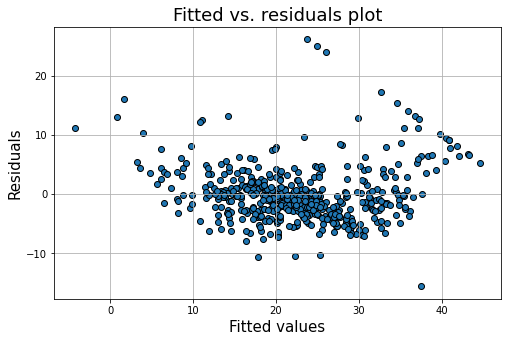

In [20]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

A residuals vs. fitted values plot is a graphical tool that helps to evaluate the quality of the model fit.

In this plot, the fitted values (i.e., the predicted response variable values) are plotted on the x-axis, while the residuals (i.e., the differences between the observed response variable values and the corresponding predicted values) are plotted on the y-axis.

Ideally, the residuals should be randomly scattered around the zero line, with no discernible pattern. This indicates that the model has captured all the linear relationships between the predictor variables and the response variable.

If there is a pattern in the residuals, it suggests that the model has not captured all the important information in the data. For example, if the residuals form a curved pattern, this suggests that a nonlinear model might be more appropriate. If the residuals are not randomly scattered but instead show a clear pattern (e.g., a U-shape or an S-shape), this suggests that there might be missing variables or other sources of nonlinearity that need to be accounted for in the model.

### Checking for linearity assumption

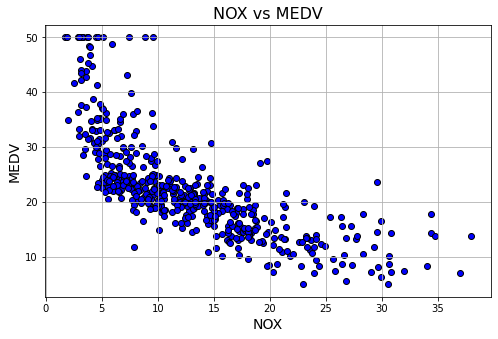

In [22]:
plt.figure(figsize=(8,5))
plt.title("NOX vs MEDV",fontsize=16)
plt.scatter(x=x.iloc[:,12],y=y,color='blue',edgecolor='k')
plt.grid(True)
plt.xlabel("NOX",fontsize=14)
plt.ylabel('MEDV',fontsize=14)
plt.show() 

Correlations:

In [25]:
#create a single data frame with both features and target by concatonating
boston_df=pd.concat([df,target], axis=1)

boston_df[['CRIM','ZN', 'NOX', 'INDUS','CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']].corr()

,CRIM,ZN,NOX,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.420972,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.516604,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
NOX,0.420972,-0.516604,1.000000,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
INDUS,0.406583,-0.533828,0.763651,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.091203,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,1.000000,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.302188,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.731470,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.769230,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.611441,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


### Check for multicollinearity

Plot a correlation matric to check for multicollinearity (or you can even plot scatter plots and get an idea)

#### plotting the correlation matrix

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

<AxesSubplot:>

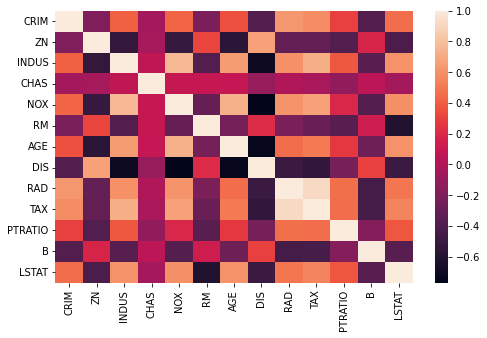

In [27]:
import seaborn as sns
corr = x.corr()
print(corr)
plt.figure(figsize=(8,5))
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=
corr.columns.values )

#### Show corr

<AxesSubplot:>

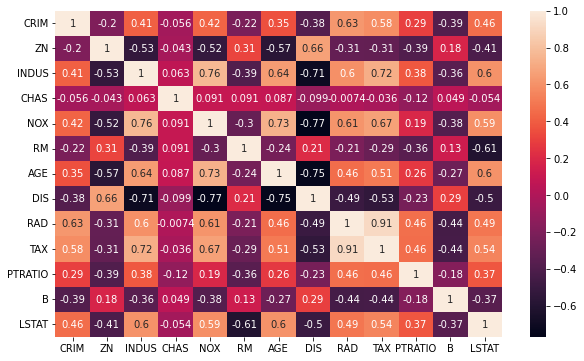

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True )

The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. This can affect the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

<AxesSubplot:>

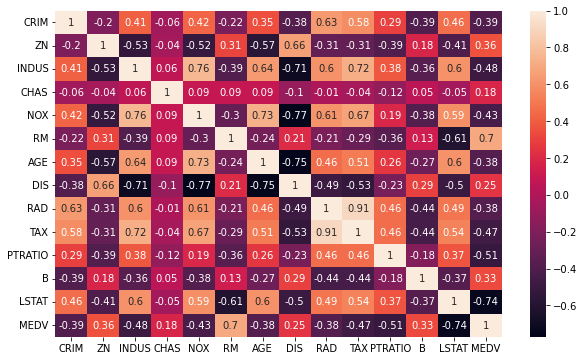

In [52]:
correlation_matrix = boston_df.corr().round(2)
plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot=True)

From the above coorelation plot we can see that MEDV is strongly correlated to LSTAT, RM

RAD and TAX are stronly correlated, so we don't include this in our features together to avoid multi-colinearity


#### # Plot scatter plots

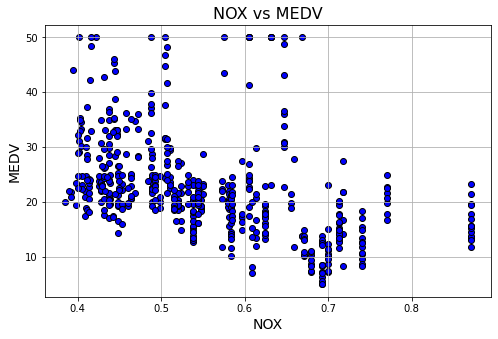

In [33]:
import matplotlib.pyplot as plt # to plot scatter plots
plt.figure(figsize=(8,5))
plt.title("NOX vs MEDV",fontsize=16)
plt.scatter(x=x.iloc[:,4],y=y,color='blue',edgecolor='k')
plt.grid(True)
plt.xlabel("NOX",fontsize=14)
plt.ylabel('MEDV',fontsize=14)
plt.show()

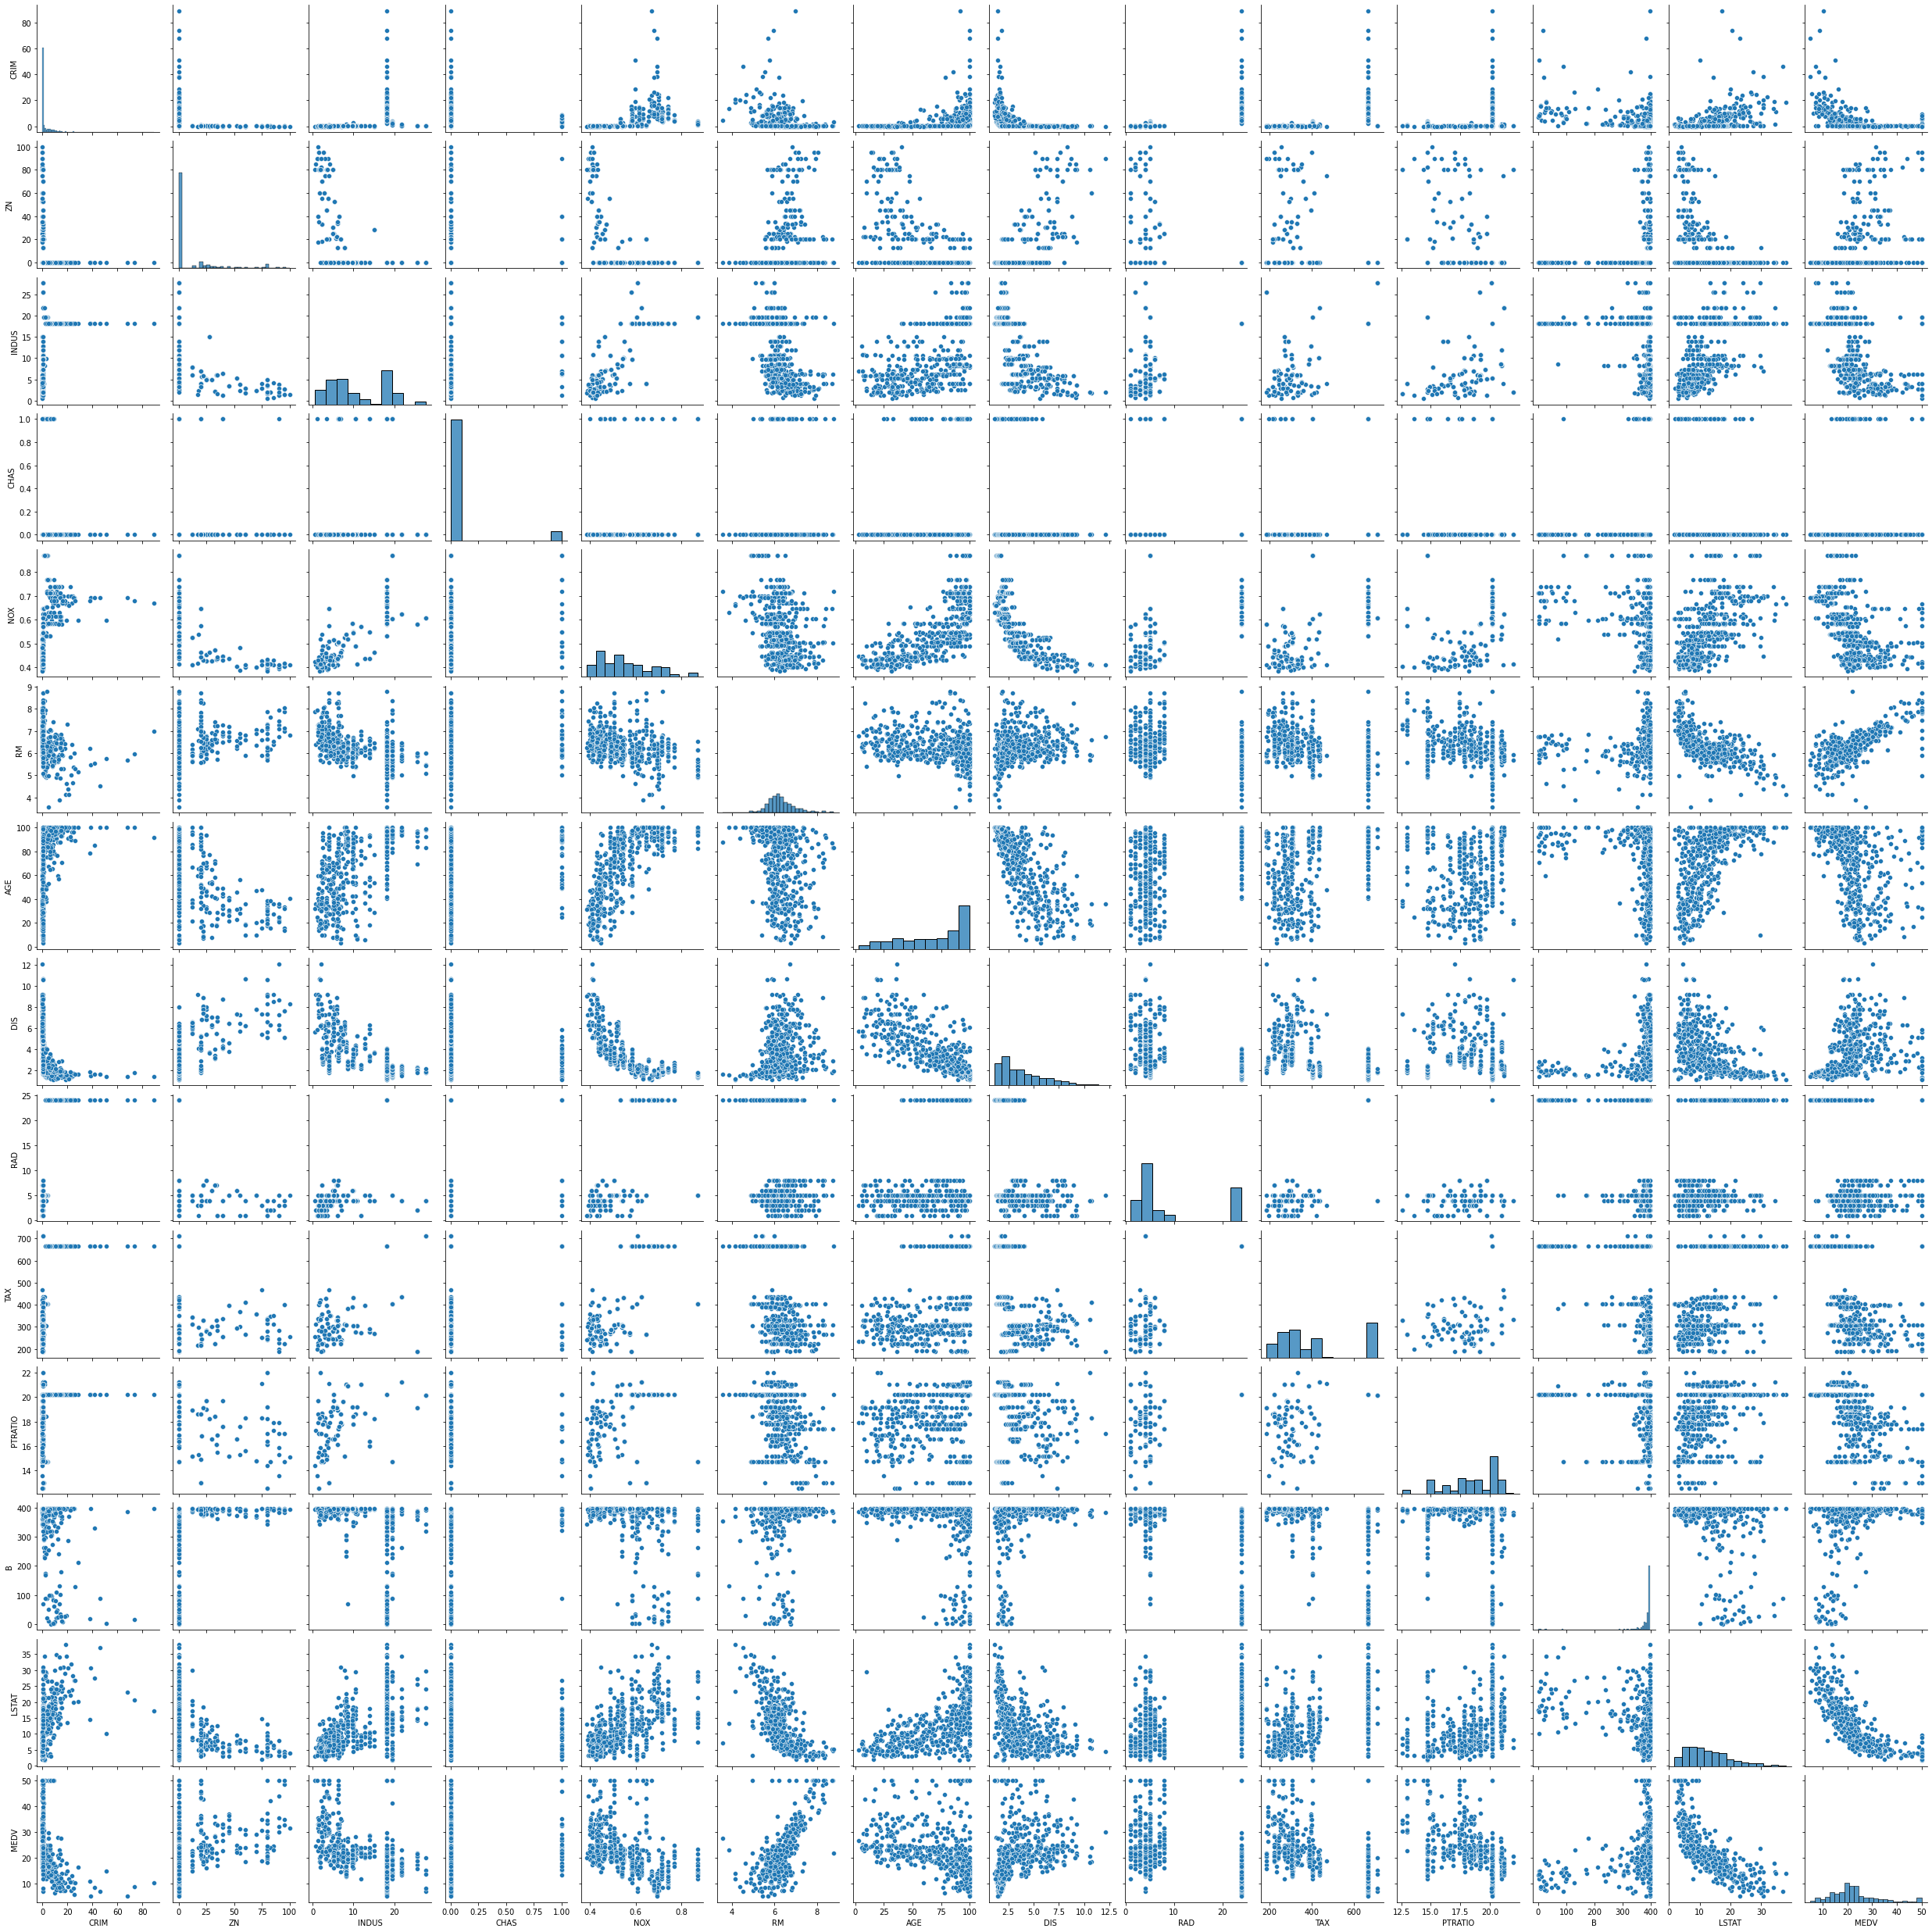

In [40]:
import seaborn as sns
sns.pairplot(boston_df)

#given variables  sns.pairplot(boston_df, vars = ['RM', 'ZN', 'BLACK', 'DIS', 'CHAS','MEDV'])

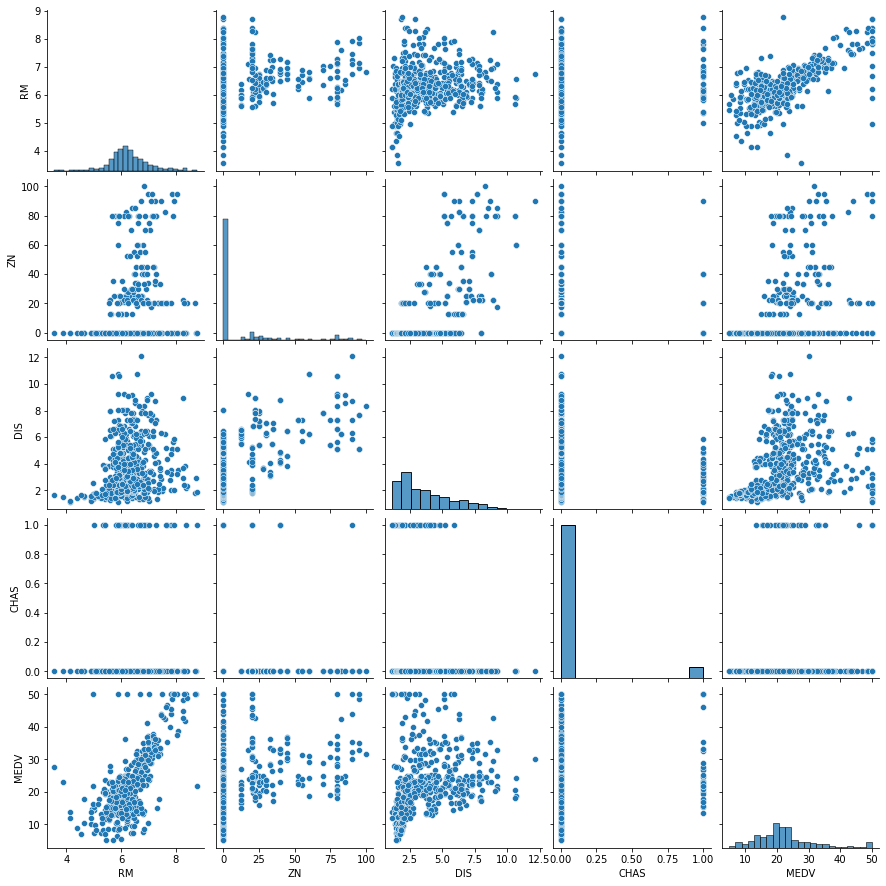

In [44]:
sns.pairplot(boston_df, vars = ['RM', 'ZN','DIS', 'CHAS','MEDV'])

### Checking for independence of the model Residuals vs. time plots

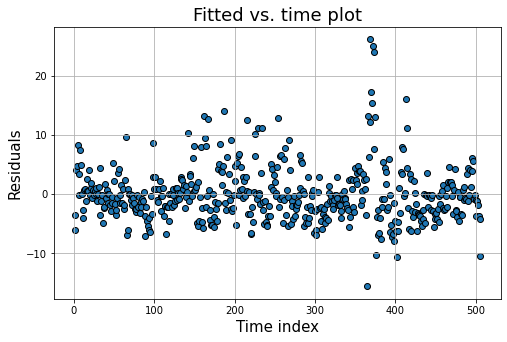

In [34]:
#correlation or error terms 
plt.figure(figsize=(8,5))
p=plt.scatter(x=np.arange(1,507,1),y=fitted.resid,edgecolor='k')
plt.xlabel("Time index",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. time plot",fontsize=18)
plt.grid(True)
plt.show()

To check for independence of the model residuals over time, we can plot the residuals against the time variable. This can be done using a scatter plot, with the residuals on the y-axis and the time variable on the x-axis. If there is no trend or pattern in the plot, then the residuals are independent of time. If there is a trend or pattern, then further investigation may be necessary to determine the cause and whether the model needs to be revised.

### Checking for normality assumption using Q-Q plot

<Figure size 576x360 with 0 Axes>

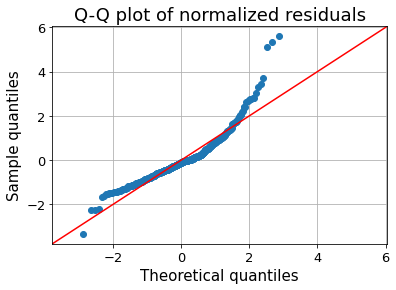

In [45]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

If the residuals follow a straight line, it suggests that they are normally distributed, and hence the normality assumption of linear regression is met. However, if the residuals deviate significantly from a straight line, it suggests that they are not normally distributed, and hence the normality assumption may not be met.

C:\Users\rpath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


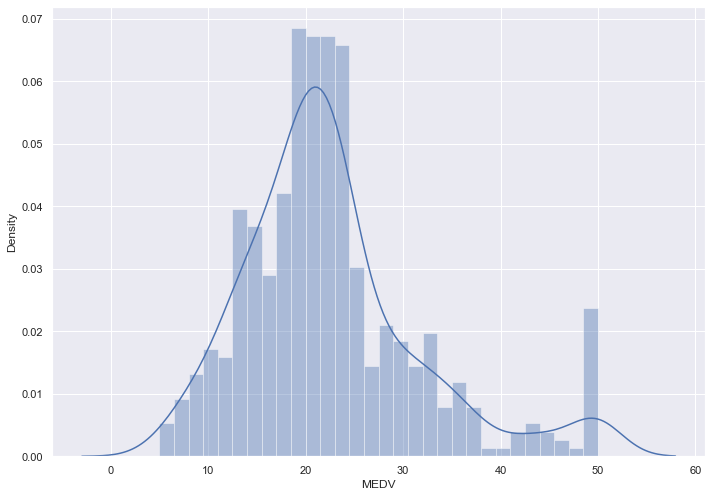

In [55]:
#HISTOGRAM OF RESIDUALS
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_df['MEDV'], bins=30)
plt.show()

The values of MEDV are distributed normally with few outliers.